<a href="https://www.kaggle.com/code/rebeccaboizo/co-t-d-assurance-des-hommes-vs-des-femmes?scriptVersionId=297137789" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Dans cette analyse notre but est d'étudier les correlations existantes entre les différences du cout de l'assurance chez les hommes et chez les femmes et les facteurs de vie ( fumeur, non fumeur, enfants, sans enfants ...)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-cost-dataset/insurance.csv


# Informations générales sur le dataset

**1)dataset**

In [2]:
medical_assurance_cost = pd.read_csv("/kaggle/input/medical-insurance-cost-dataset/insurance.csv")
medical_assurance_cost


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**2)infos**

In [3]:
medical_assurance_cost.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [4]:

print("la taille du dataset est  ", medical_assurance_cost.shape)
print("les colonnes sont ", medical_assurance_cost.columns)
print("le type de chaque colonne est",medical_assurance_cost.dtypes)


la taille du dataset est   (1338, 7)
les colonnes sont  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
le type de chaque colonne est age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


**3)Visuels du dataset**

In [5]:
def plot_hist(df: pd.DataFrame, col: str):
    plt.figure()
    df[col].hist(bins=20)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

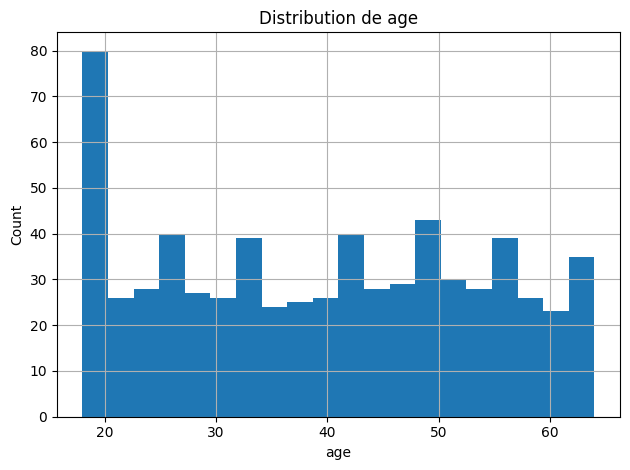

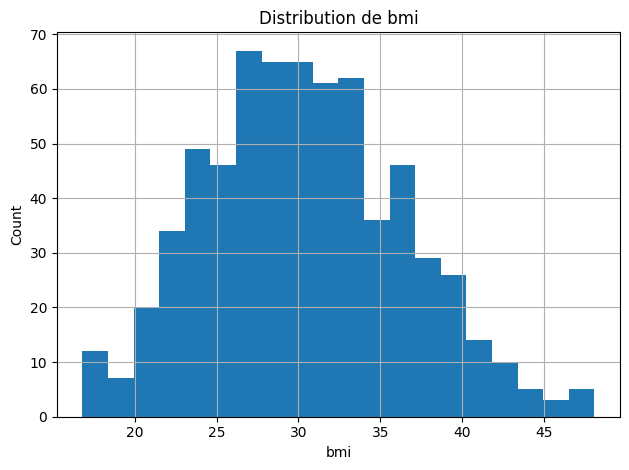

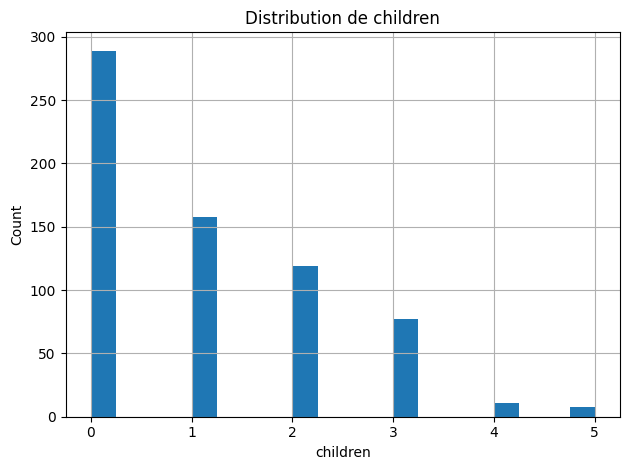

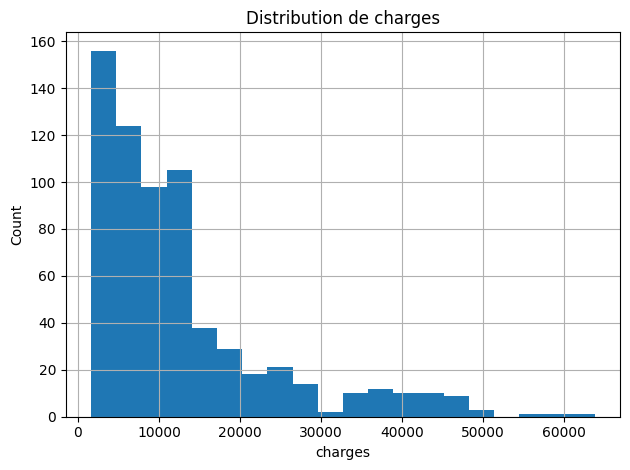

In [6]:
fem=medical_assurance_cost[medical_assurance_cost["sex"]=="female"]
for col in ["age", "bmi", "children", "charges"]:
    plot_hist(fem,col)

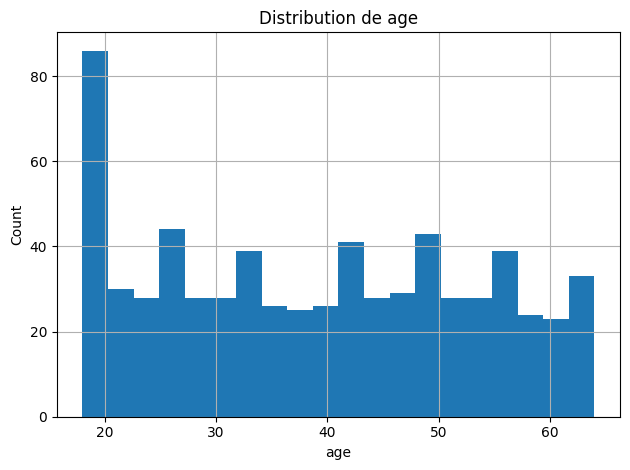

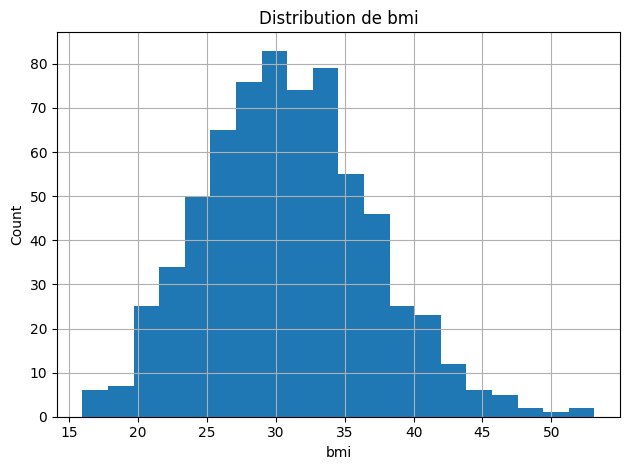

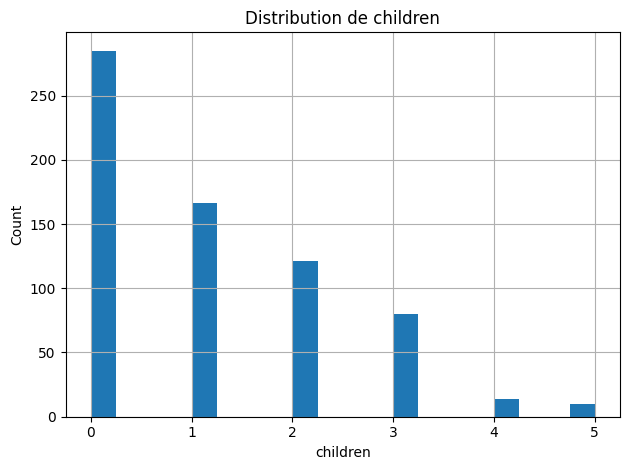

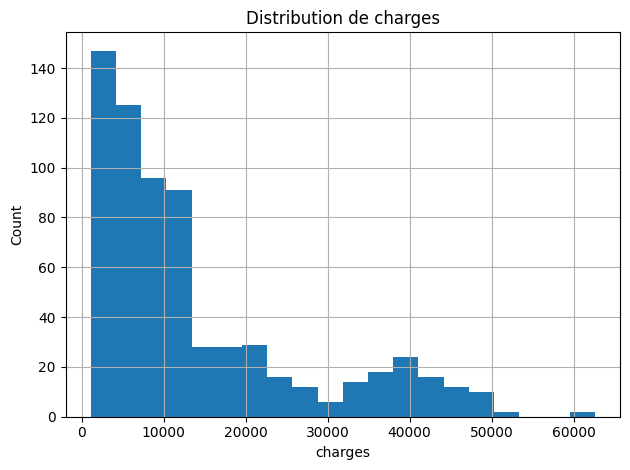

In [7]:
mal=medical_assurance_cost[medical_assurance_cost["sex"]=="male"]
for col in ["age", "bmi", "children", "charges"]:
    plot_hist(mal,col)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


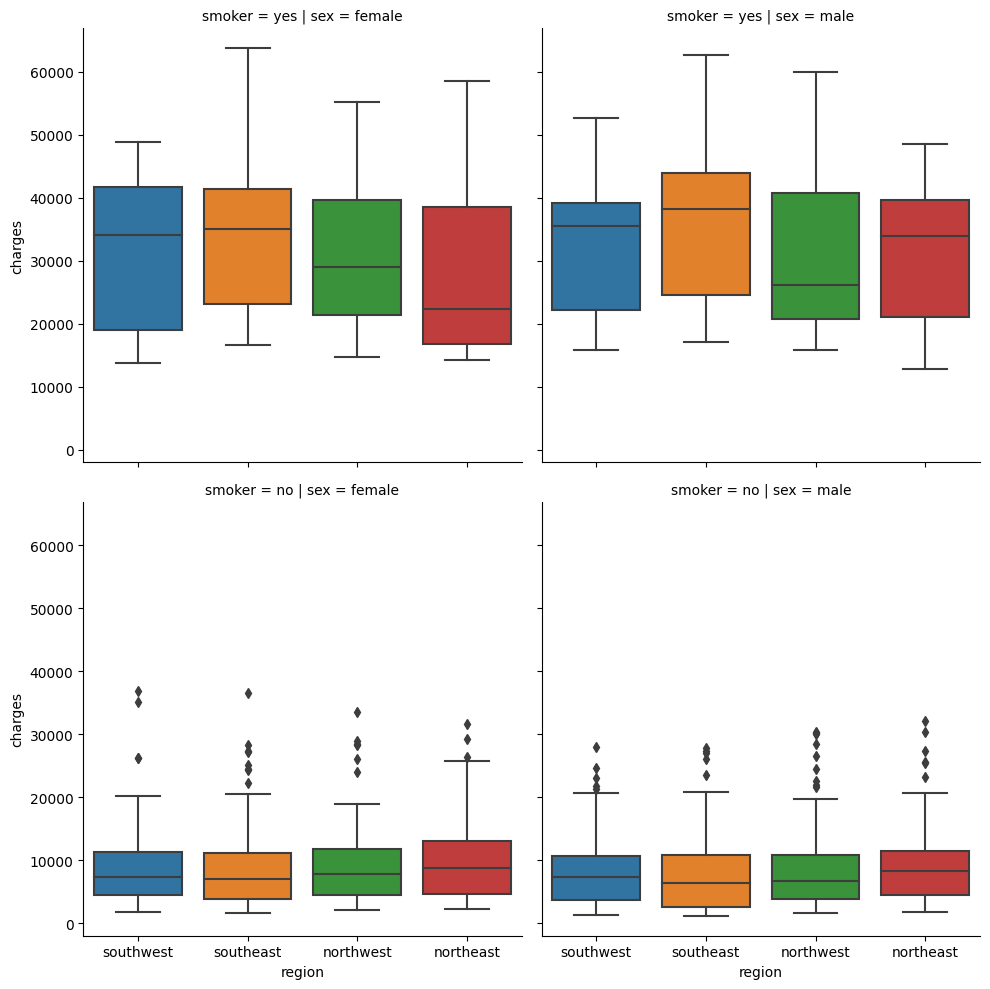

In [8]:
# graphe du cout de l'assurance par sexe,region et tabagisme
sns.catplot(x="region",y="charges",data=medical_assurance_cost,col="sex",row="smoker",kind="box")

# Analyse du dataset

**Coût d'assurance par sexe**

les hommes paient en general  11.04 % de charges que les femmes


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

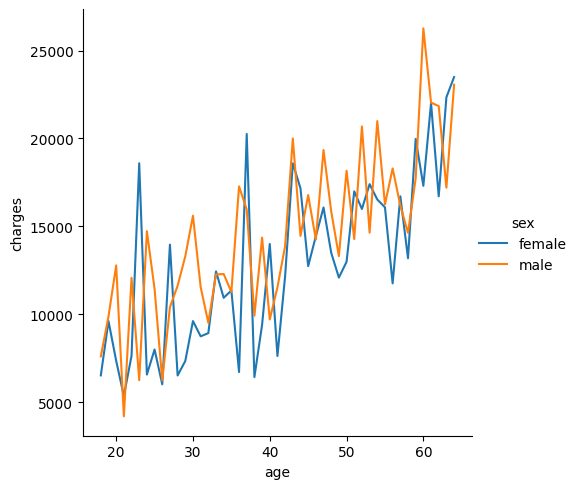

In [9]:
# Coût  d'asurance des femmes vs des hommes 
medical_assurance_cost["female"]=medical_assurance_cost["sex"].str.lower().str.contains("female")
final = round(((mal["charges"].mean()-fem["charges"].mean())/fem["charges"].mean())*100,2)
print( 'les hommes paient en general ',final,'% de charges que les femmes')
sns.relplot(x="age",y="charges",data= medical_assurance_cost,kind='line',errorbar=None,hue="sex")


En général, les hommes paient davantage de charges d’assurance que les femmes. Il reste à comprendre les raisons de cet écart : est-ce lié au nombre d’enfants, aux habitudes de santé ou encore à la région dans laquelle ils vivent ?
Dans la suite de notre analyse, nous chercherons à identifier les facteurs qui expliquent ces différences : les hommes fument-ils plus que les femmes ? Ont-ils davantage d’enfants ou un indice de masse corporelle (IMC) plus élevé ?

# Quel est le coût d'assurance des femmes par tranche d'âge ? 

In [10]:
# moyenne des charges des femmes par âge
fem=medical_assurance_cost[medical_assurance_cost["sex"]=="female"]
bins=[0,25,40,70]
labels = ["0-25","26-40","41-70"]
fem["age_group"]= pd.cut(fem["age"],bins=bins,labels=labels,right=True)
fem_charge_by_age = fem.groupby("age_group")["charges"].mean().reindex(labels)
fem_charge_by_age.round(0)


/tmp/ipykernel_13/3176842517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem["age_group"]= pd.cut(fem["age"],bins=bins,labels=labels,right=True)
/tmp/ipykernel_13/3176842517.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fem_charge_by_age = fem.groupby("age_group")["charges"].mean().reindex(labels)


age_group
0-25      8574.0
26-40    10136.0
41-70    15870.0
Name: charges, dtype: float64

In [11]:
moyenne_globale=fem["charges"].mean()
pourcentage_diff = ((fem_charge_by_age - moyenne_globale) / moyenne_globale * 100).round(1)
pourcentage_diff
tableau = pd.DataFrame({
    "Coût moyen (€)": fem_charge_by_age.round(0),
    "% par rapport à la moyenne": pourcentage_diff
})
tableau 

,Coût moyen (€),% par rapport à la moyenne
age_group,,
0-25,8574.0,-31.8
26-40,10136.0,-19.4
41-70,15870.0,26.3


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='age_group', ylabel='charges'>

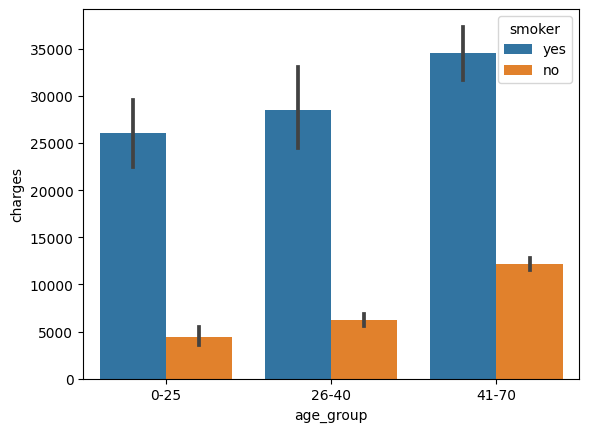

In [12]:
sns.barplot(data=fem,x="age_group",y="charges",hue="smoker")

En conclusion les femmes de plus de 41 ans paient 26.3% de charges que celles de moins de 41 ans. cela peut se justifier par le nombre d'enfants à charge, la situation geographique ou encore les habitudes de santé comme fumer. 

# Quel est le coût d'assurance des hommes par tranche d'âge ? 

In [13]:
#hommes 
mal=medical_assurance_cost[medical_assurance_cost["sex"]=="male"]
bins=[0,25,40,70]
labels = ["0-25","26-40","41-70"]
mal["age_group"]= pd.cut(mal["age"],bins=bins,labels=labels,right=True)
mal_charge_by_age = mal.groupby("age_group")["charges"].mean().reindex(labels)
mal_charge_by_age

moyenne_globale=mal["charges"].mean()
pourcentage_diff = ((mal_charge_by_age - moyenne_globale) / moyenne_globale * 100).round(1)
pourcentage_diff
tableau = pd.DataFrame({
    "Coût moyen (€)": mal_charge_by_age.round(0),
    "% par rapport à la moyenne": pourcentage_diff
})
tableau 




/tmp/ipykernel_13/2401282717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mal["age_group"]= pd.cut(mal["age"],bins=bins,labels=labels,right=True)
/tmp/ipykernel_13/2401282717.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mal_charge_by_age = mal.groupby("age_group")["charges"].mean().reindex(labels)


,Coût moyen (€),% par rapport à la moyenne
age_group,,
0-25,9562.0,-31.5
26-40,12024.0,-13.8
41-70,17398.0,24.7


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='age_group', ylabel='charges'>

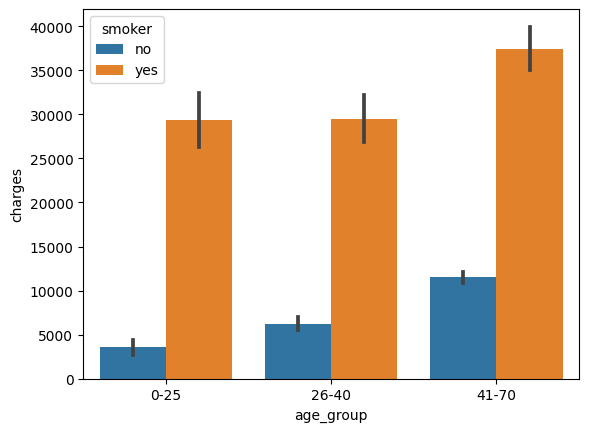

In [14]:
# graphe  du cout des charges des hommes par tranche d'age 
sns.barplot(data=mal,x="age_group",y="charges",hue="smoker")

Maintenant que nous avons vu les différences entre les hommes et les femmes en général, ainsi qu’entre chaque groupe d’hommes ou de femmes, nous allons à présent mener une analyse comparative plus détaillée entre les hommes et les femmes.
Nous commençons d’abord par étudier le pourcentage d’hommes fumeurs et de femmes fumeuses, ainsi que les charges payées.

les hommes fumeurs sont 159 et paient en moyenne 33042.0
les femmes fumeuses sont 115 et paient en moyenne 30679.0


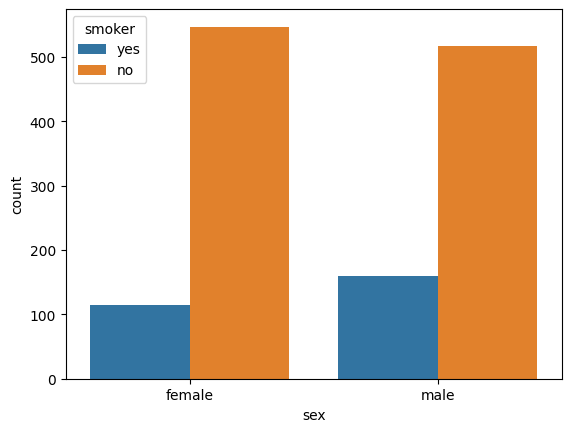

In [15]:
#création des sous-groupes de femmes/hommes par classe de fumeuses 
fs=fem[fem["smoker"]=="yes"].count().loc["smoker"]
ms=mal[mal["smoker"]=="yes"].count().loc["smoker"]
sns.countplot(x="sex",data=medical_assurance_cost,hue="smoker")
c=fem[fem["smoker"]=="yes"]
c["charges"].mean()
h=mal[mal["smoker"]=="yes"]
h["charges"].mean()
print("les hommes fumeurs sont",ms,"et paient en moyenne",h["charges"].mean().round(0))
print("les femmes fumeuses sont",fs,"et paient en moyenne",c["charges"].mean().round(0))

In [16]:
#calcul des pourcentages de hommes/femmes fumeurs(euses) et leurs charges  
k=len(fem[fem["smoker"] == "yes"]) / len(fem) * 100
j=len(mal[mal["smoker"] == "yes"])/len(mal)*100
f=c["charges"].mean()
l=h["charges"].mean() 
m=medical_assurance_cost["charges"].mean()
diff = ((l - f) / f) * 100
print("les femmes fumeuses représentes",round(k,2),"de la population feminine")
print("les homme fumeurs reprsentes ",round(j,2),"de la population masculine")
if diff > 0:
    print("les hommes fumeurs paient", round(diff),"% de plus que les femmes fumeuses")
else : 
    print("les hommes fumeurs paient", round(diff),"% de plus que les femmes fumeuses")

les femmes fumeuses représentes 17.37 de la population feminine
les homme fumeurs reprsentes  23.52 de la population masculine
les hommes fumeurs paient 8 % de plus que les femmes fumeuses


À ce stade de notre analyse, nous remarquons que l’une des raisons pour lesquelles les hommes paient davantage réside dans leurs habitudes de santé : près de 24 % des hommes sont fumeurs, contre 17 % des femmes.
Dans la suite de notre analyse, nous chercherons à identifier les différences entre les hommes et les femmes selon plusieurs caractéristiques :

-le pourcentage d’hommes fumeurs ayant des enfants, ainsi que leurs charges d’assurance ;

-le pourcentage d’hommes non fumeurs avec enfants ;

-le pourcentage d’hommes sans enfants et fumeurs ;

-le pourcentage d’hommes sans enfants et non fumeurs.


Nous procéderons de la même manière pour les femmes, afin de comparer les profils et de mieux comprendre l’influence du tabagisme et de la situation familiale sur le coût de l’assurance.

# Liste des caractéristiques des hommes (fumeurs, non-fumeurs, avec ou sans enfants)

In [17]:
# hommes avec enfants 

mc=mal[mal["children"]>=1]
mcs=mc[mc["smoker"]=="yes"]
mcns=mc[mc["smoker"]=="no"]
mse =mal[mal["children"]== 0]
msef=mse[mse["smoker"]=="yes"]
mses=mse[mse["smoker"]=="no"]
a=msef["charges"].mean()
b=mses["charges"].mean()
h=mcs["charges"].mean()
g=mcns["charges"].mean()
mal_list = {"classe" : ["hommes avec enfants et fumeurs","hommes avec enfants non fumeurs","hommes sans enfants et fumeurs","hommes sans enfants et non fumeurs"],
            "Effectif": [mcs.shape[0],mcns.shape[0],msef.shape[0],mses.shape[0]],
            "Cout moyen d'assurance (€)":[h.round(),g.round(),a.round(0),b.round(0)]}
pd.DataFrame(mal_list)
df_mal = pd.DataFrame(mal_list)

# Pourcentages
df_mal["% des hommes"] = (df_mal["Effectif"] / mal.shape[0] * 100).round(1)
df_mal["% vs moyenne globale"] = ((df_mal["Cout moyen d'assurance (€)"] - moyenne_globale)
                                  / moyenne_globale * 100).round(1)

df_mal


,classe,Effectif,Cout moyen d'assurance (€),% des hommes,% vs moyenne globale
0,hommes avec enfants et fumeurs,97,33770.0,14.3,142.0
1,hommes avec enfants non fumeurs,294,8509.0,43.5,-39.0
2,hommes sans enfants et fumeurs,62,31902.0,9.2,128.6
3,hommes sans enfants et non fumeurs,223,7531.0,33.0,-46.0


(array([0, 1, 2, 3]),
 [Text(0, 0, 'hommes avec enfants et fumeurs'),
  Text(1, 0, 'hommes avec enfants non fumeurs'),
  Text(2, 0, 'hommes sans enfants et fumeurs'),
  Text(3, 0, 'hommes sans enfants et non fumeurs')])

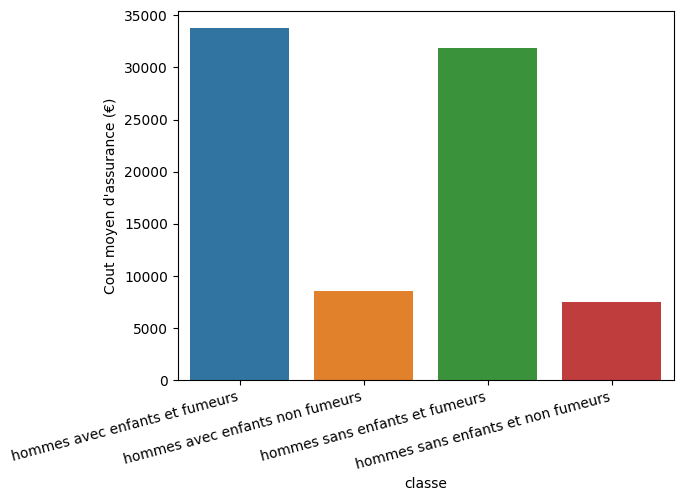

In [18]:
sns.barplot(data=df_mal, x="classe", y="Cout moyen d'assurance (€)")
plt.xticks(rotation=15, ha='right')


# Liste des caractéristiques des femmes (fumeuses, non-fumeuses, avec ou sans enfants)


In [19]:
n=fem[fem["children"]>=1]
ffe=n[n["smoker"]=="yes"]["charges"].mean()
fnfe=n[n["smoker"]=="no"]["charges"].mean()
fsansenfant =fem[fem["children"]== 0]
fsf=fsansenfant[fsansenfant["smoker"]=="yes"]["charges"].mean()
fsnf=fsansenfant[fsansenfant["smoker"]=="no"]["charges"].mean()
o=n[n["smoker"]=="yes"].shape[0]
p=n[n["smoker"]=="no"].shape[0]
q=fsansenfant[fsansenfant["smoker"]=="yes"].shape[0]
r=fsansenfant[fsansenfant["smoker"]=="no"].shape[0]

mal_list = {"classe" : ["femmes avec enfants et fumeuses","femmes avec enfants non fumeuses","femmes sans enfants et fumeuses","femmes sans enfants et non fumeuses"],
            "Effectif": [o,p,q,r],
            "Cout moyen d'assurance (€)":[ffe.round(),fnfe.round(),fsf.round(0),fsnf.round(0)]}
pd.DataFrame(mal_list)
df_fem  = pd.DataFrame(mal_list)
moyenne_globale_f = fem["charges"].mean()
df_fem["% des femmes"] = (df_fem["Effectif"] / fem.shape[0] * 100).round(1)
df_fem["% vs moyenne globale"] = ((df_fem["Cout moyen d'assurance (€)"] - moyenne_globale)
                                  / moyenne_globale * 100).round(1)

df_fem


,classe,Effectif,Cout moyen d'assurance (€),% des femmes,% vs moyenne globale
0,femmes avec enfants et fumeuses,62,30674.0,9.4,119.8
1,femmes avec enfants non fumeuses,311,9577.0,47.0,-31.4
2,femmes sans enfants et fumeuses,53,30685.0,8.0,119.9
3,femmes sans enfants et non fumeuses,236,7688.0,35.6,-44.9


(array([0, 1, 2, 3]),
 [Text(0, 0, 'femmes avec enfants et fumeuses'),
  Text(1, 0, 'femmes avec enfants non fumeuses'),
  Text(2, 0, 'femmes sans enfants et fumeuses'),
  Text(3, 0, 'femmes sans enfants et non fumeuses')])

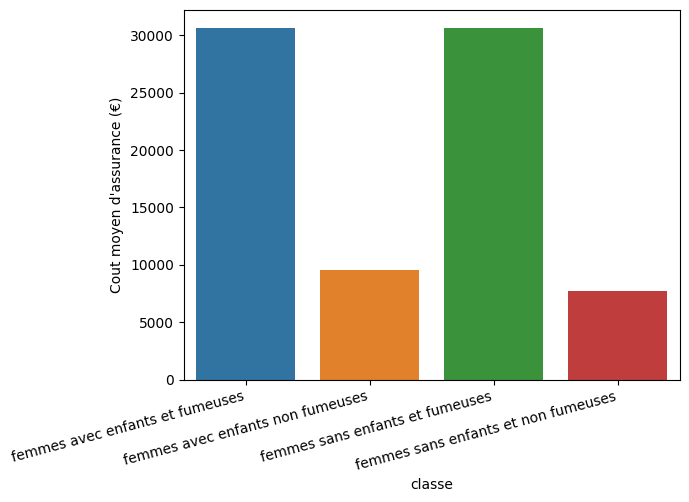

In [20]:
sns.barplot(data=df_fem,x="classe",y="Cout moyen d'assurance (€)")
plt.xticks(rotation=15,ha="right")

In [21]:
#tableau récapitulatif 
df_total = pd.concat([df_fem, df_mal], ignore_index=True,)
df_total.fillna(0)

,classe,Effectif,Cout moyen d'assurance (€),% des femmes,% vs moyenne globale,% des hommes
0,femmes avec enfants et fumeuses,62,30674.0,9.4,119.8,0.0
1,femmes avec enfants non fumeuses,311,9577.0,47.0,-31.4,0.0
2,femmes sans enfants et fumeuses,53,30685.0,8.0,119.9,0.0
3,femmes sans enfants et non fumeuses,236,7688.0,35.6,-44.9,0.0
4,hommes avec enfants et fumeurs,97,33770.0,0.0,142.0,14.3
5,hommes avec enfants non fumeurs,294,8509.0,0.0,-39.0,43.5
6,hommes sans enfants et fumeurs,62,31902.0,0.0,128.6,9.2
7,hommes sans enfants et non fumeurs,223,7531.0,0.0,-46.0,33.0


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'femmes avec enfants et fumeuses'),
  Text(1, 0, 'femmes avec enfants non fumeuses'),
  Text(2, 0, 'femmes sans enfants et fumeuses'),
  Text(3, 0, 'femmes sans enfants et non fumeuses'),
  Text(4, 0, 'hommes avec enfants et fumeurs'),
  Text(5, 0, 'hommes avec enfants non fumeurs'),
  Text(6, 0, 'hommes sans enfants et fumeurs'),
  Text(7, 0, 'hommes sans enfants et non fumeurs')])

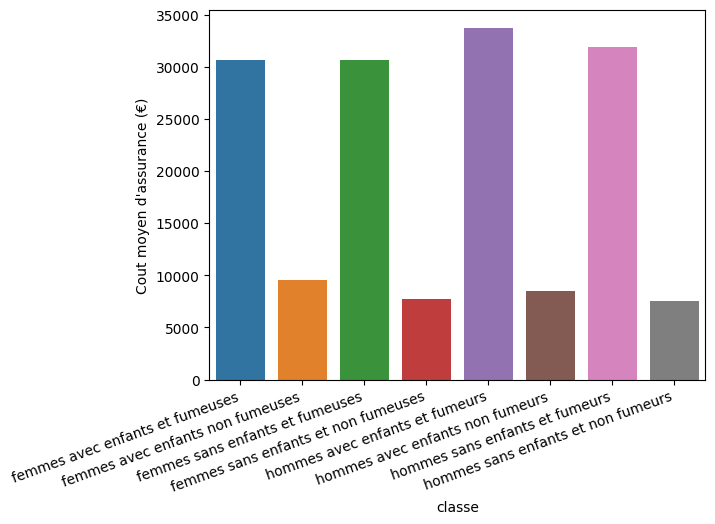

In [22]:
sns.barplot(data=df_total,x="classe",y="Cout moyen d'assurance (€)")
plt.xticks(rotation=20,ha="right")

À ce stade de notre analyse, nous avons étudié les différences entre les femmes et les hommes en général.
Selon notre graphe, nous remarquons que le tabagisme et le nombre d’enfants impactent le coût de l’assurance pour chaque sexe.

In [23]:
df_fem["Sexe"] = "Femme"
df_mal["Sexe"] = "Homme"

df_comp = pd.DataFrame({
    "Classe femme": df_fem["classe"],
    "Cout moyen femme (€)": df_fem["Cout moyen d'assurance (€)"],
    "Classe homme": df_mal["classe"],
    "Cout moyen homme (€)": df_mal["Cout moyen d'assurance (€)"]
})

df_comp["% homme vs femme"] = ((df_comp["Cout moyen homme (€)"] - df_comp["Cout moyen femme (€)"]) /
                               df_comp["Cout moyen femme (€)"] * 100).round(1)

df_comp


,Classe femme,Cout moyen femme (€),Classe homme,Cout moyen homme (€),% homme vs femme
0,femmes avec enfants et fumeuses,30674.0,hommes avec enfants et fumeurs,33770.0,10.1
1,femmes avec enfants non fumeuses,9577.0,hommes avec enfants non fumeurs,8509.0,-11.2
2,femmes sans enfants et fumeuses,30685.0,hommes sans enfants et fumeurs,31902.0,4.0
3,femmes sans enfants et non fumeuses,7688.0,hommes sans enfants et non fumeurs,7531.0,-2.0


# conclusion 

Dans cette étude, nous avons analysé les différents facteurs influençant le coût de l’assurance selon le sexe, en tenant compte du tabagisme et de la présence d’enfants. Après avoir étudié séparément les profils féminins et masculins, nous avons comparé les résultats entre les deux groupes.

Chez les femmes, les principaux éléments qui impactent le coût de l’assurance sont le tabagisme et le nombre d’enfants. En effet, les femmes fumeuses avec enfants présentent un coût moyen d’assurance de 30 674 €, contre 9 577 € pour les non-fumeuses avec enfants. Les femmes sans enfants fumeuses ont également un coût élevé (30 685 €), tandis que les non-fumeuses sans enfants bénéficient du coût le plus bas (7 688 €). Le tabagisme apparaît donc comme un facteur déterminant dans l’augmentation des charges.

Chez les hommes, la tendance est similaire : les fumeurs avec enfants paient en moyenne 33 770 €, contre 8 509 € pour les non-fumeurs avec enfants. Les fumeurs sans enfants ont un coût moyen de 31 902 €, tandis que les non-fumeurs sans enfants paient environ 7 531 €. Ces résultats confirment que le tabagisme et la présence d’enfants sont des variables clés expliquant la hausse du coût de l’assurance.

Enfin, la comparaison globale entre hommes et femmes montre que les hommes paient en moyenne plus cher que les femmes. Cela s’explique notamment par une proportion plus importante d’hommes fumeurs et par le fait qu’ils ont en moyenne plus d’enfants, ce qui entraîne mécaniquement une augmentation du coût total de l’assurance.